In [25]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import osmnx as ox
import networkx as nx

# Street Network

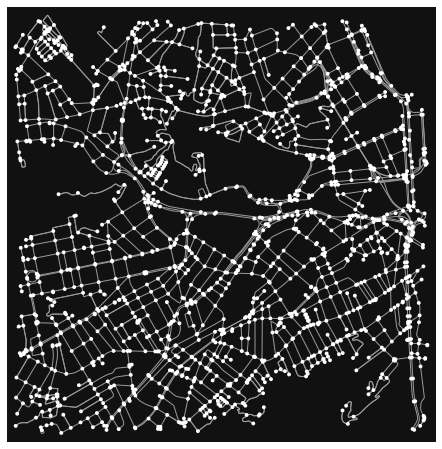

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [26]:
location_point = (-22.911667, -43.230278) #Maracanâ location point
dist = 2300
G2 = ox.graph_from_point(location_point, network_type='drive', dist=dist)
ox.plot_graph(G2)

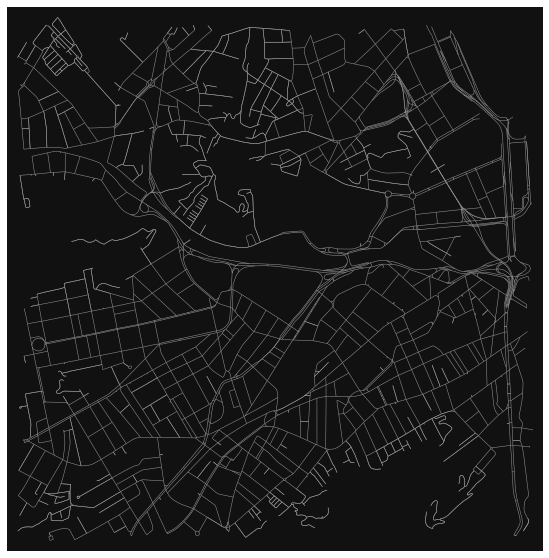

In [27]:
fig, ax = ox.plot_graph(G2, node_size=0, edge_linewidth=0.5, show=False, close=False, figsize=(18,10))

## Making it a geodataframe

In [28]:
G2_nodes, G2_edges = ox.graph_to_gdfs(G2)

<AxesSubplot:>

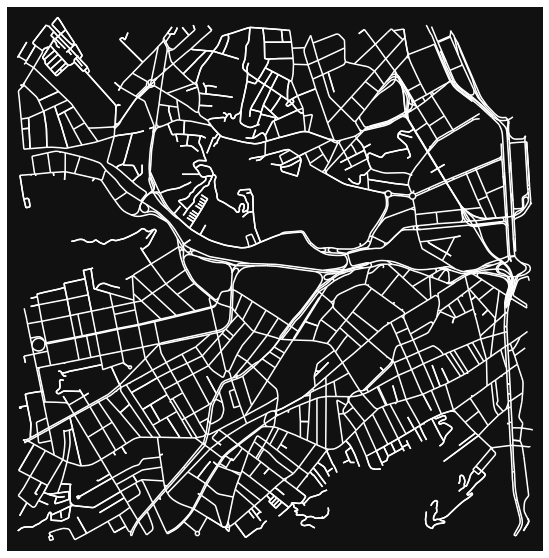

In [29]:
fig, ax = ox.plot_graph(G2, node_size=0, edge_linewidth=0.5, show=False, close=False, figsize=(18,10))
G2_edges.plot(ax=ax, color="White", figsize=(18,10))

## Saving

In [30]:
import os
dir = '../../data/StreetNetwork'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [31]:
problematic = [
    "osmid",
    "bridge",
    "oneway",
    "lanes",
    "ref",
    "name",
    "highway",
    "maxspeed",
    "reversed",
    "access",
    "junction",
    "width"
]
#  convert selected columns to string format
G2_edges[problematic] = G2_edges[problematic].astype(str)

In [32]:
G2_edges.to_file(dir + '/G2_edges.shp')

# Buildings

In [33]:
tags = {"building": True}
buildings = ox.geometries_from_point(location_point, tags, dist=dist)
buildings_proj = ox.project_gdf(buildings)
bbox = ox.utils_geo.bbox_from_point(point=location_point, dist=dist, project_utm=True)

<AxesSubplot:>

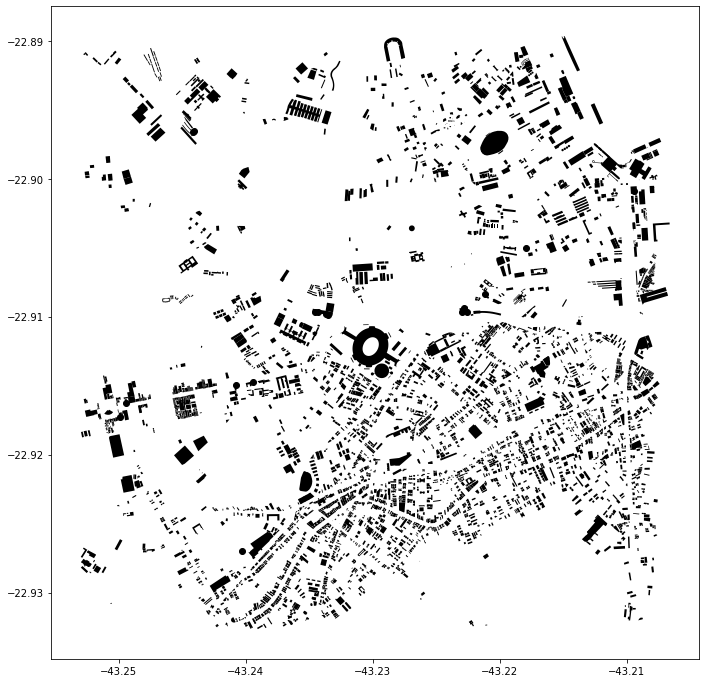

In [34]:
buildings.plot(color="Black", figsize=(22,12))

## Saving

In [35]:
import os
dir = '../../data/Buildings'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [36]:
buildings[['geometry', 'name', 'addr:street']].to_file(dir + '/buildings.geojson')

# Maracanã as a building

In [18]:
edification = gpd.read_file('../../../Stadiums - Brazil/01.Dados/Edification/Edifica%C3%A7%C3%B5es_(2013).shp')

In [20]:
maracana = edification[edification["cod_unico"] == 511227]

## Saving

In [21]:
import os
dir = '../../data/Maracana'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [23]:
maracana.to_file(dir + '/maracana.geojson')